In [1]:
import pandas as pd
import random as rd
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("dataunklasifikasi.csv")

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


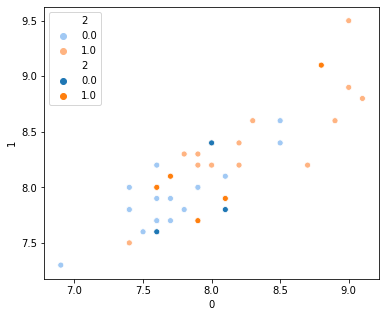

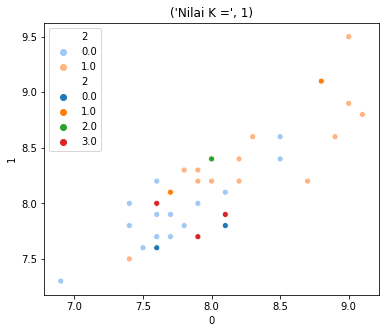

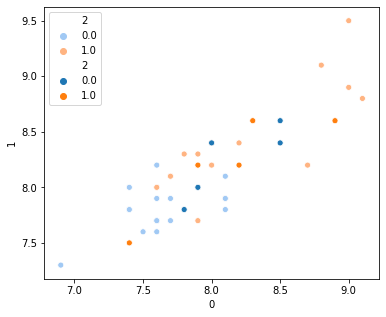

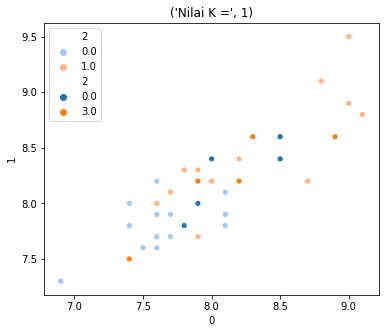

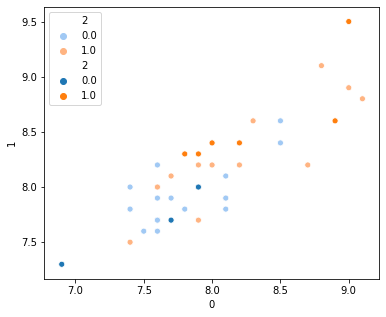

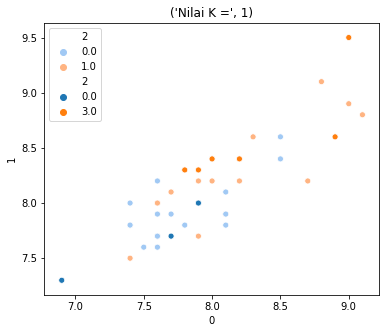

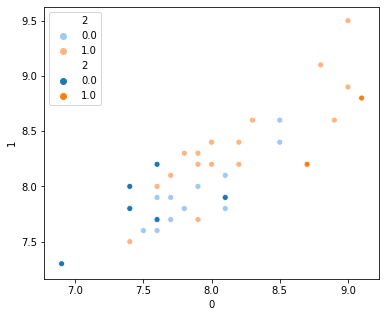

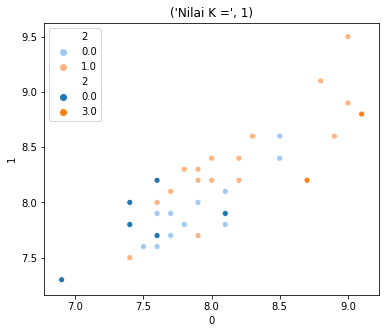

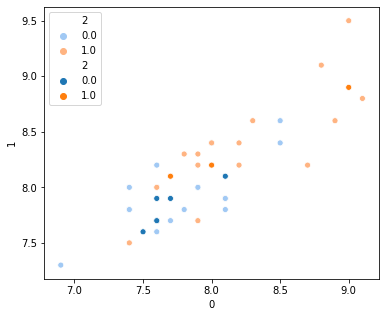

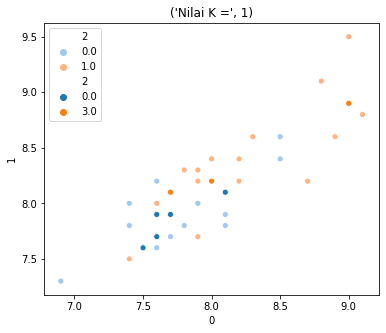

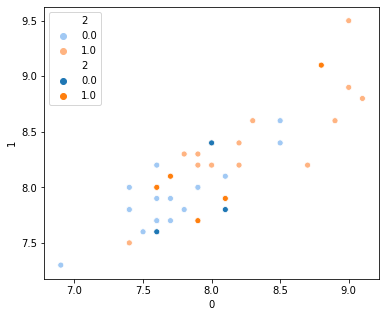

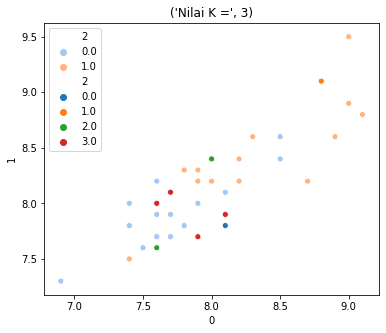

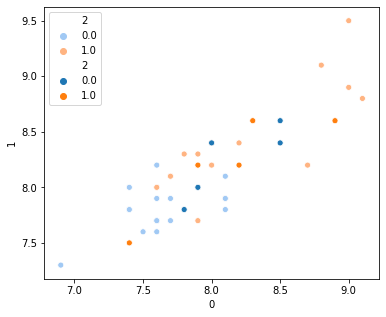

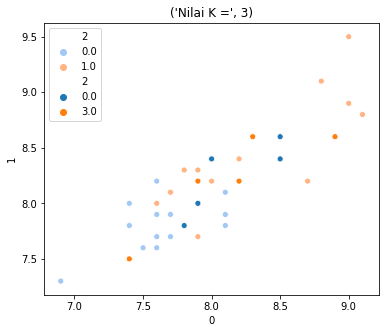

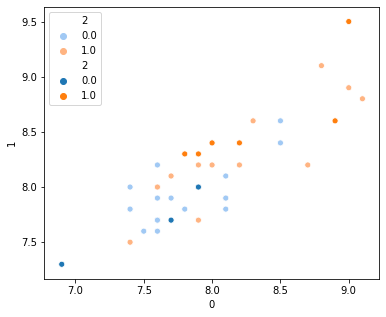

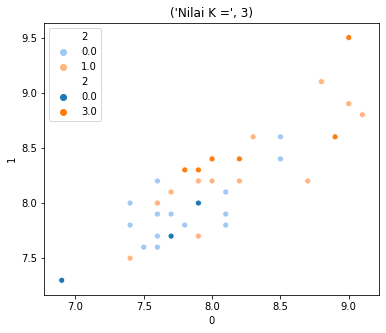

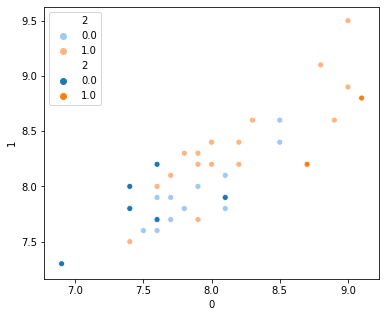

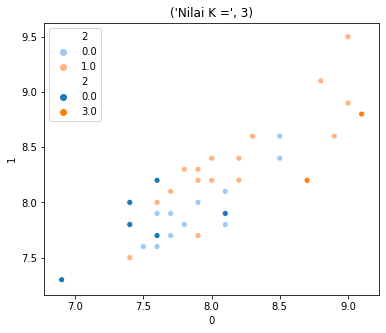

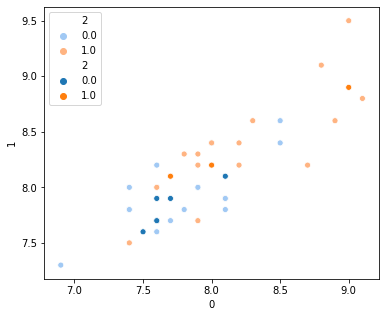

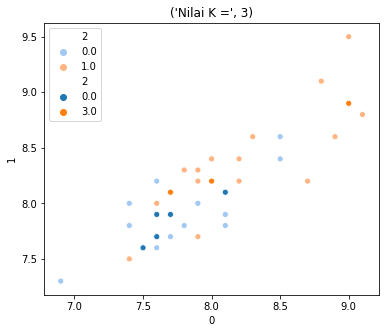

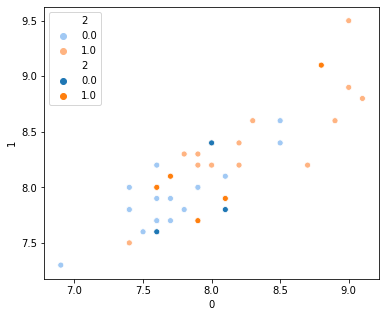

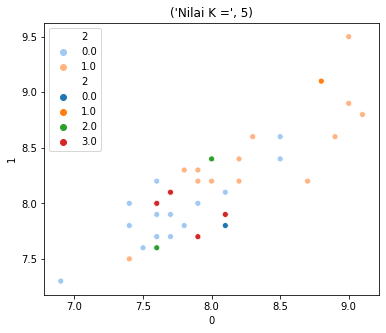

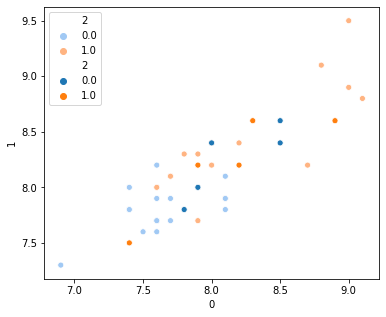

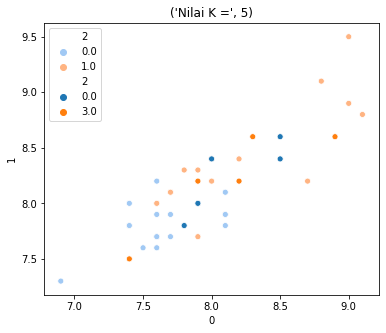

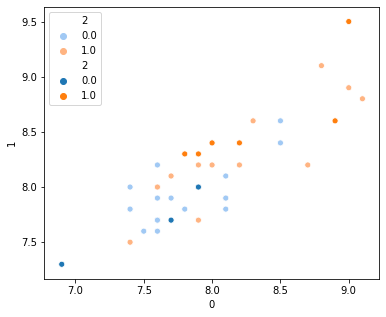

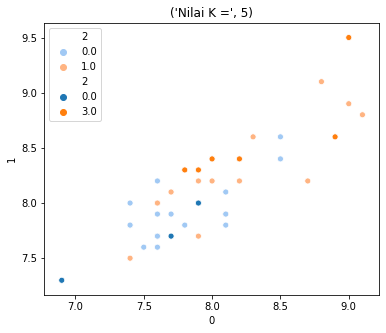

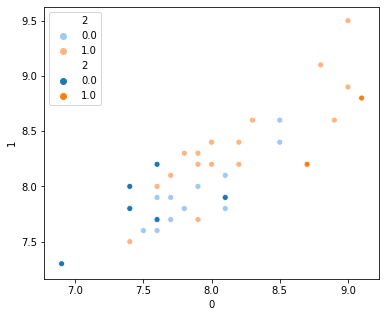

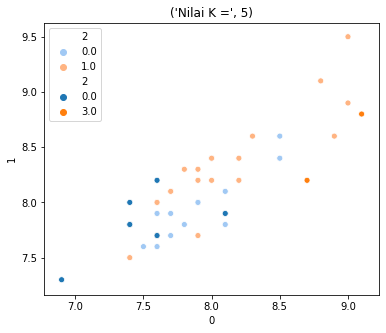

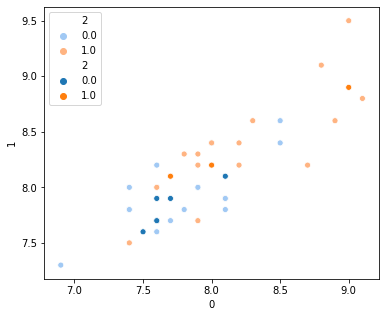

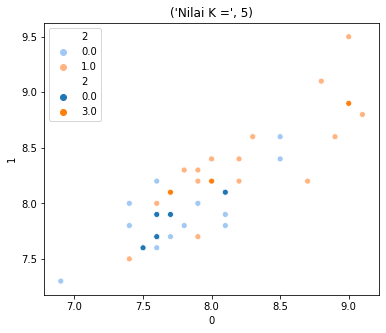

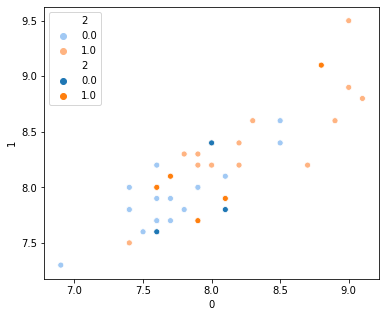

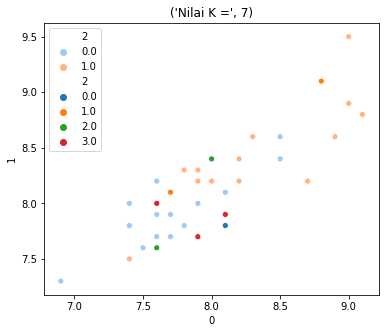

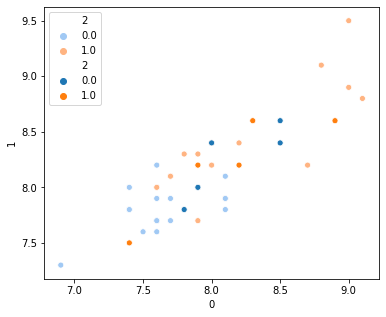

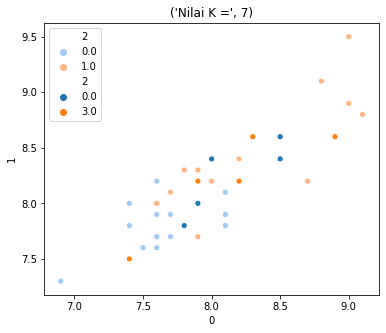

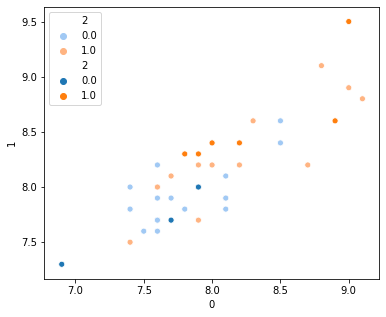

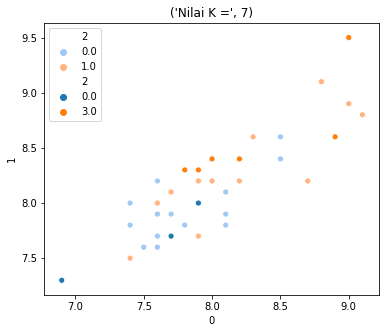

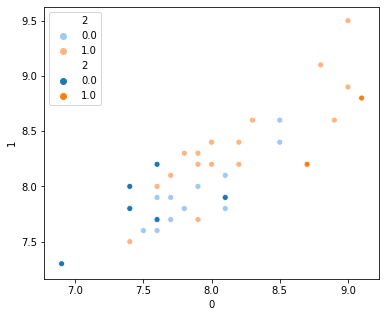

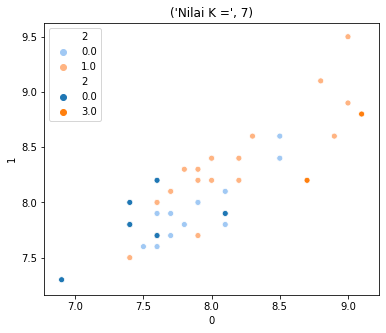

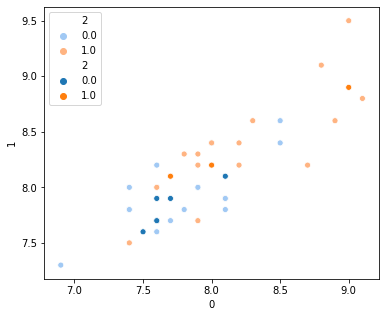

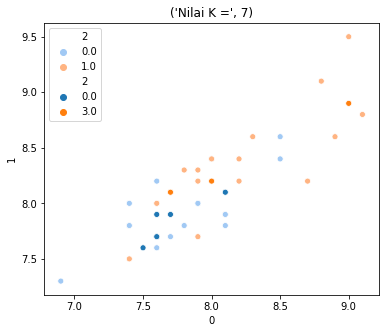

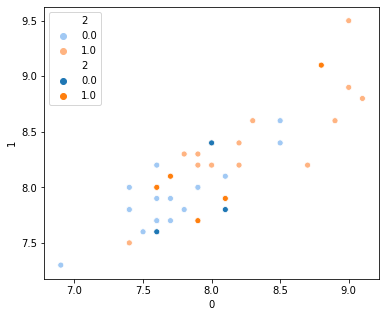

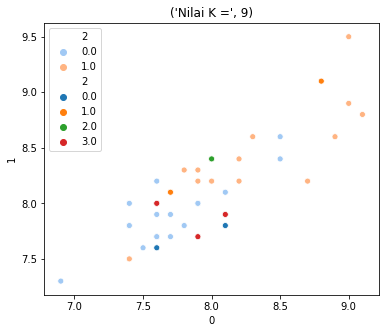

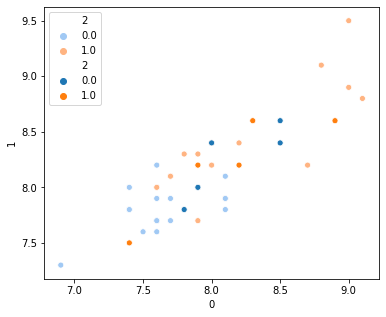

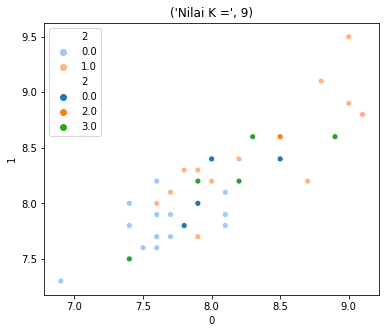

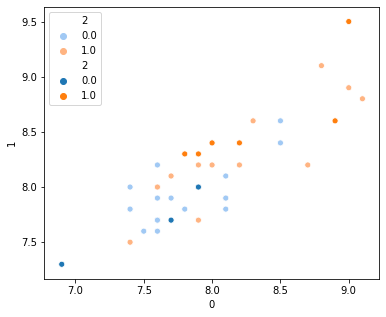

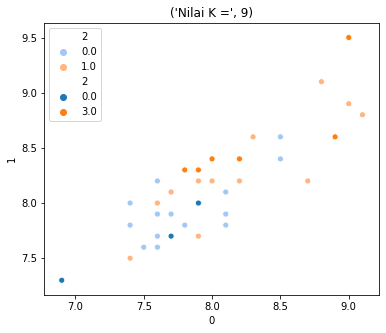

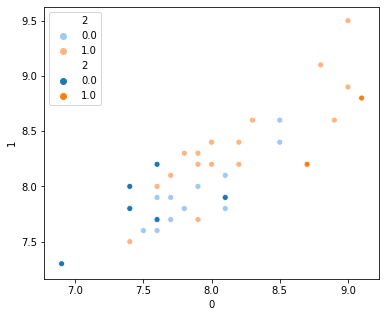

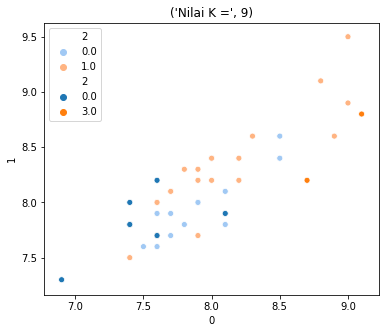

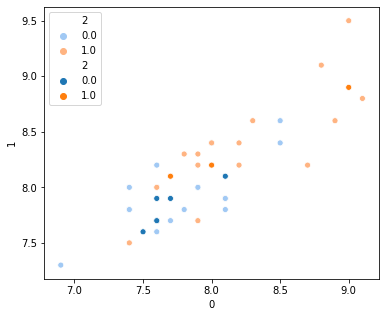

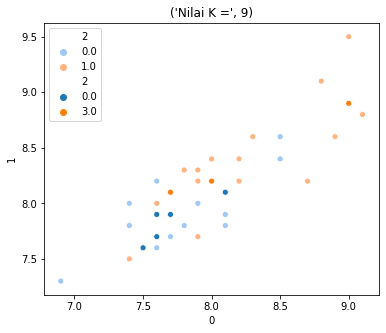

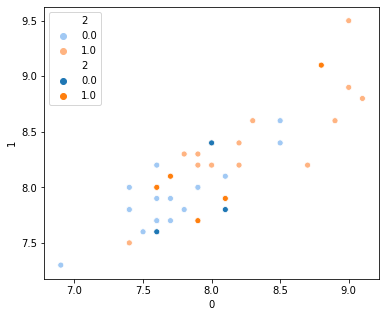

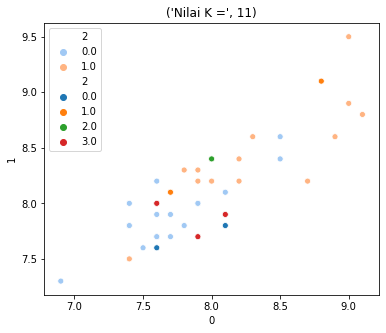

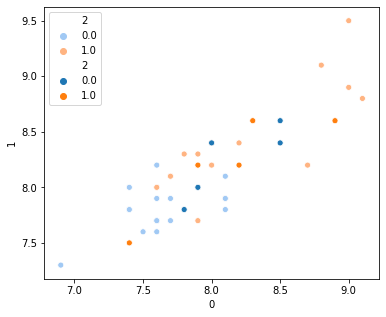

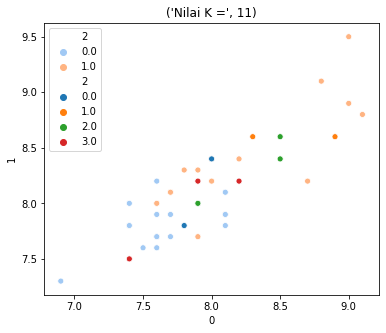

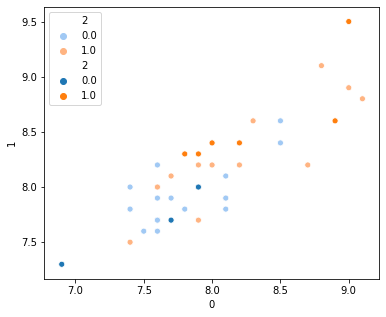

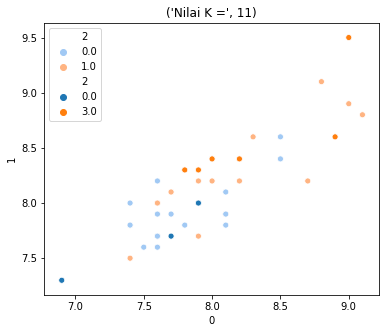

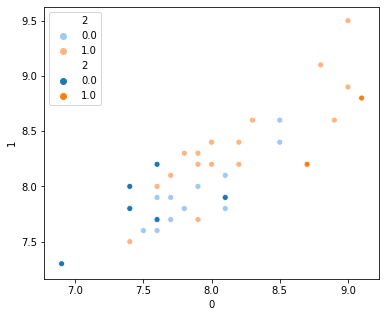

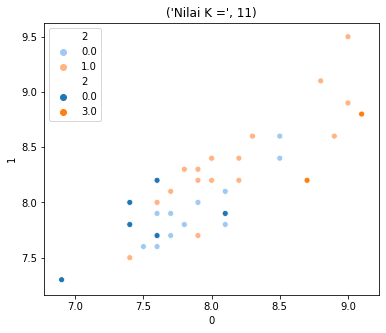

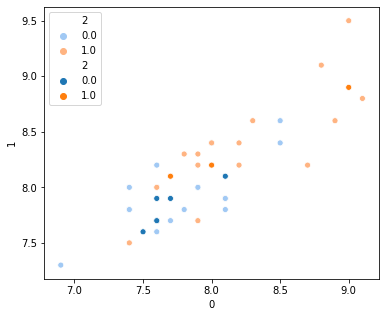

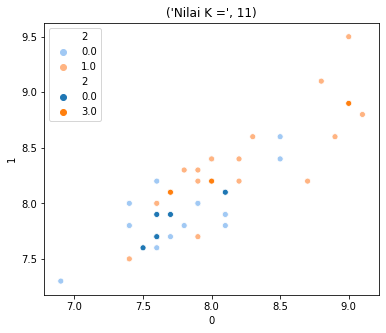

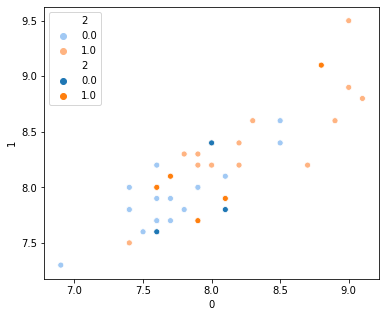

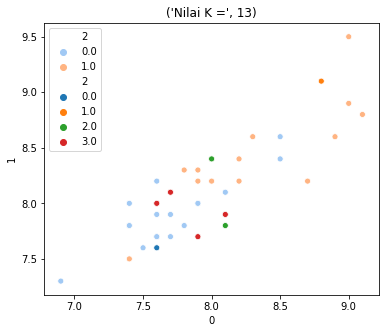

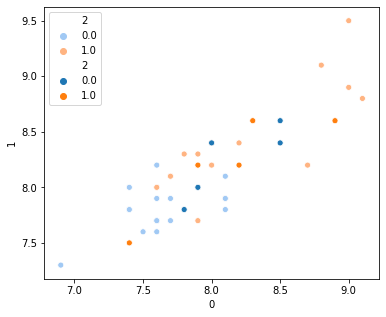

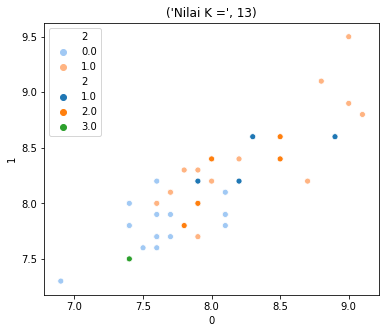

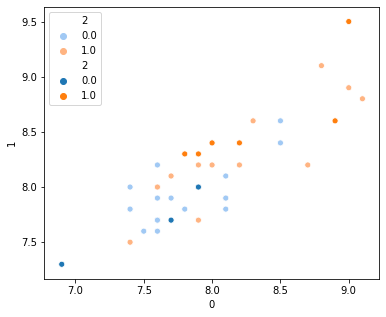

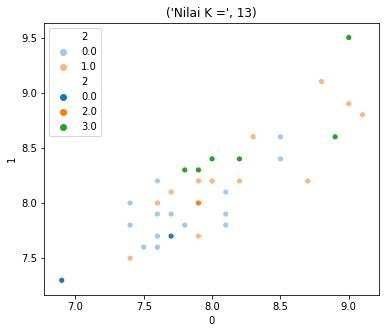

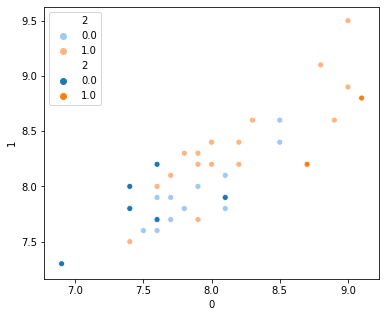

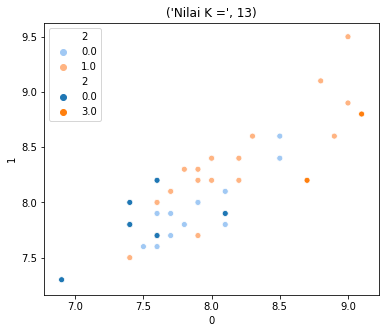

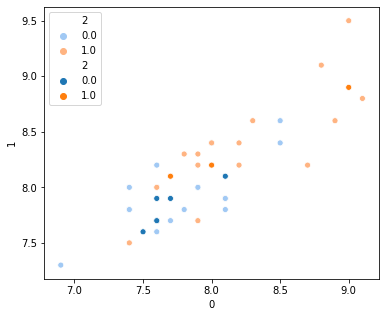

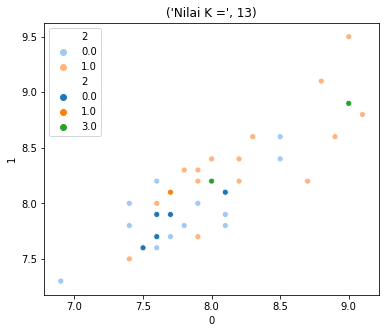

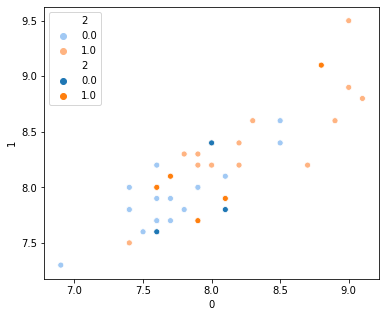

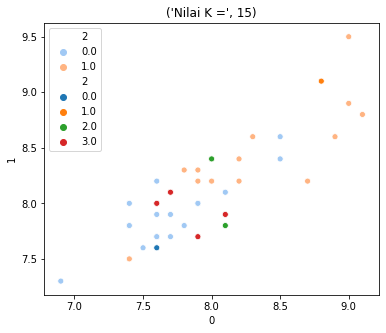

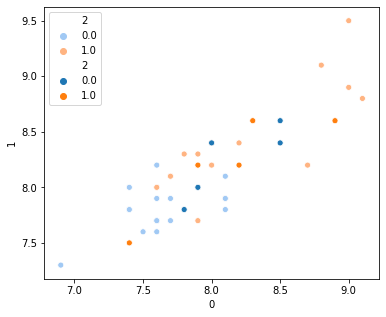

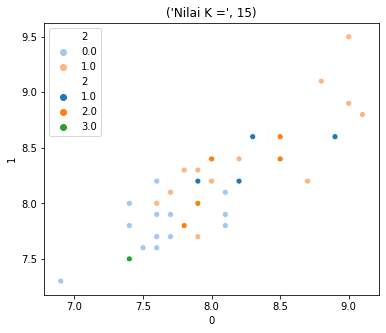

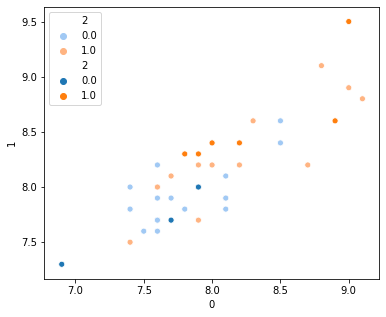

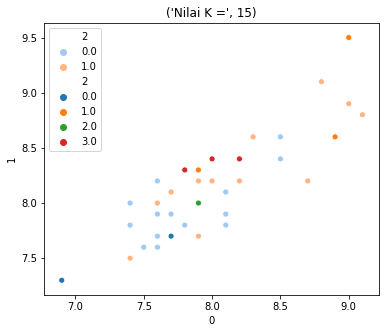

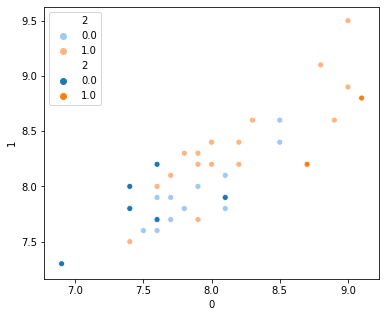

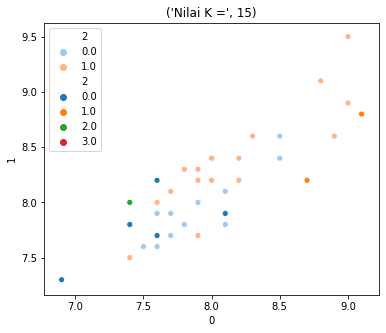

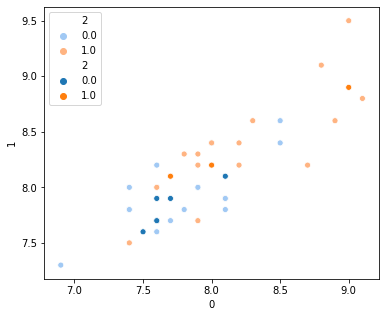

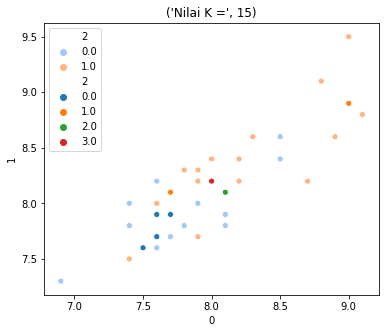

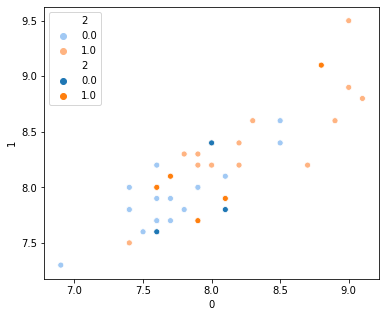

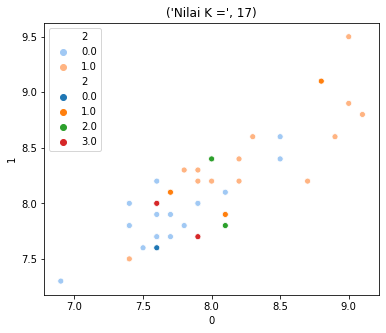

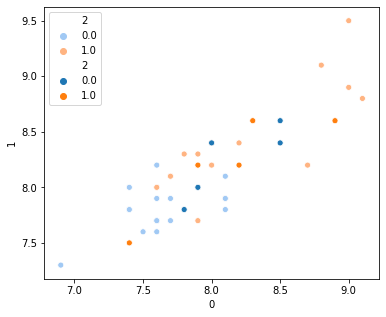

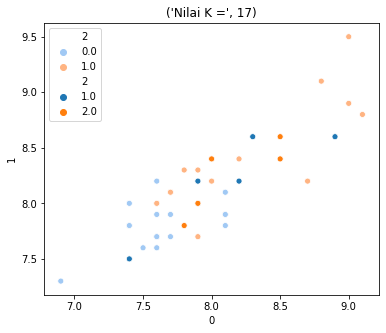

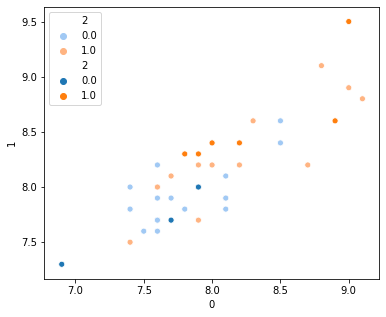

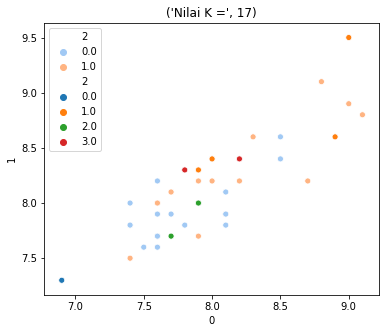

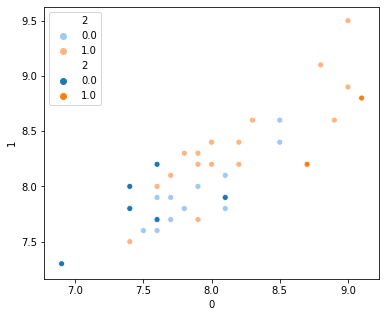

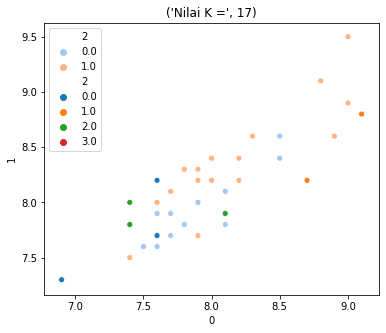

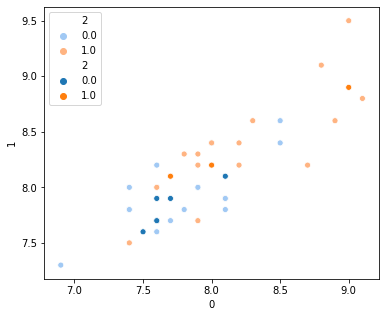

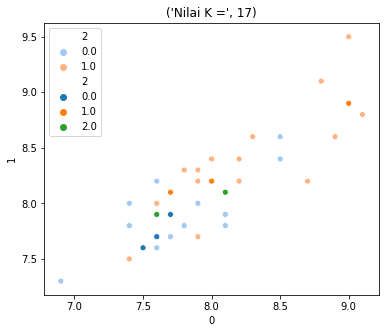

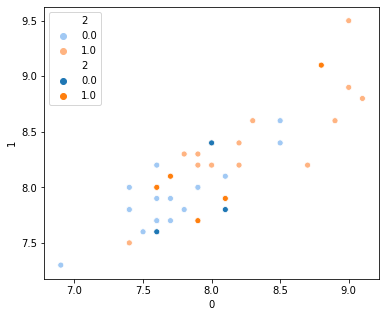

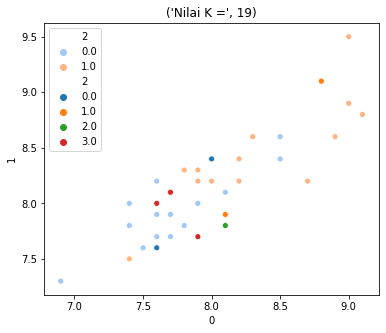

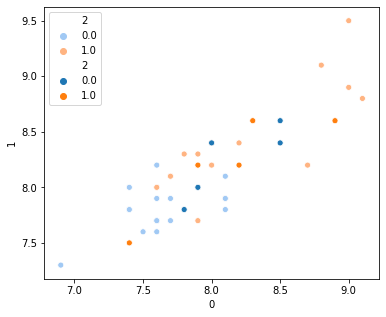

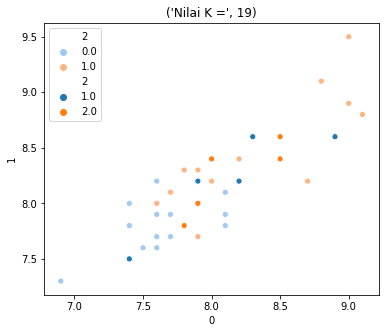

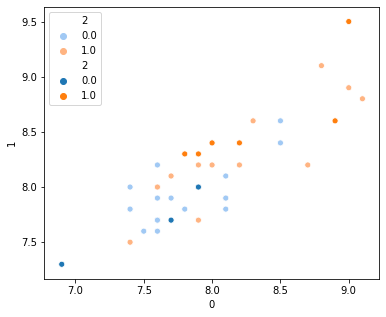

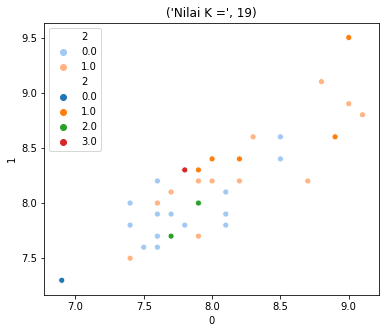

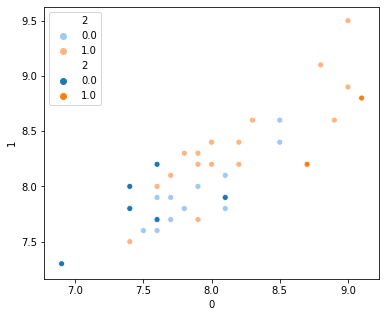

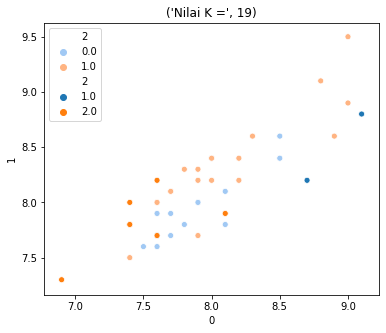

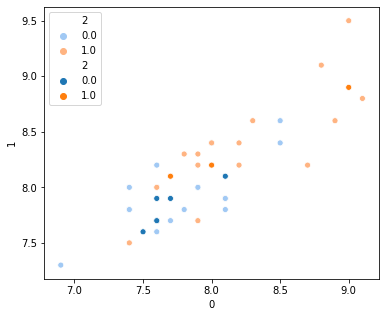

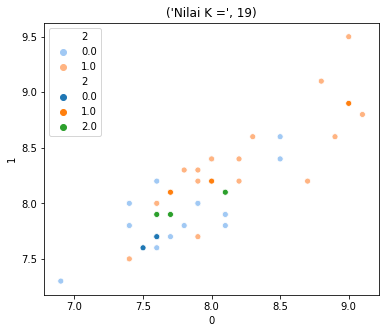

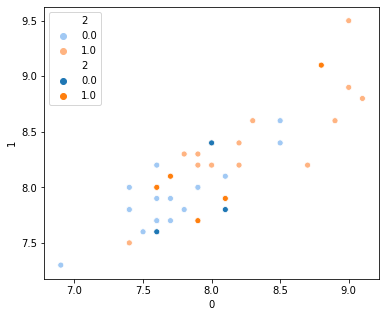

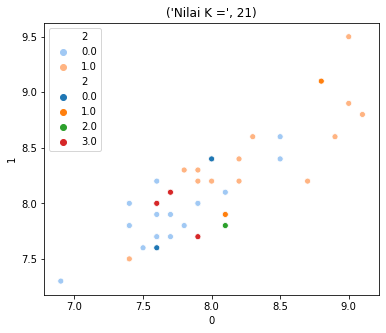

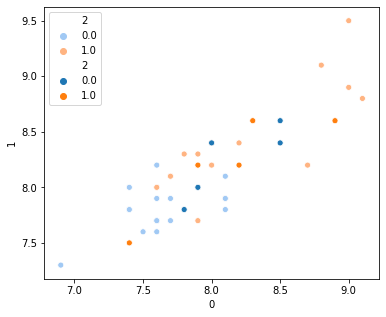

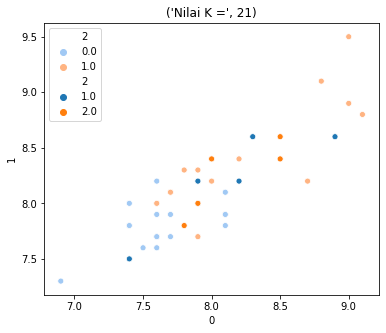

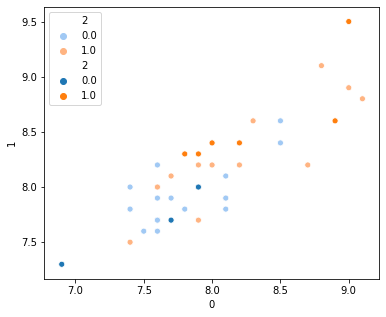

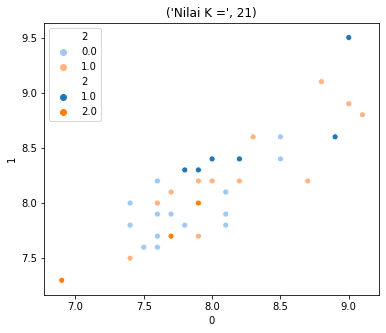

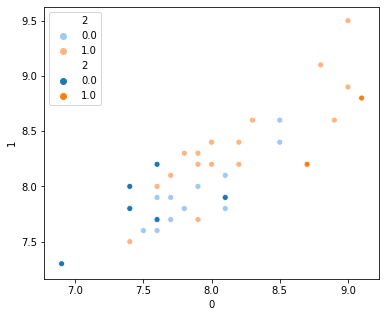

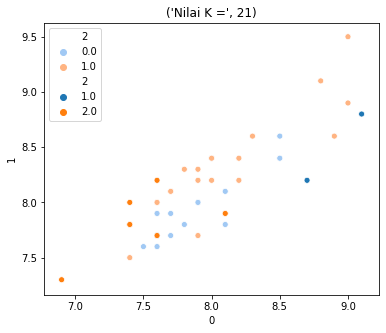

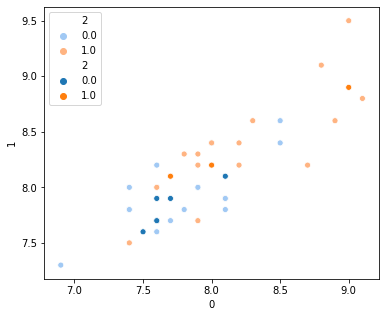

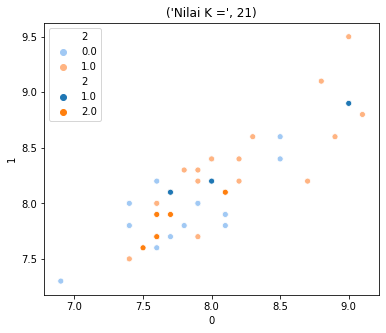

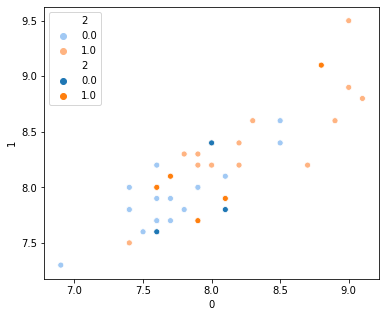

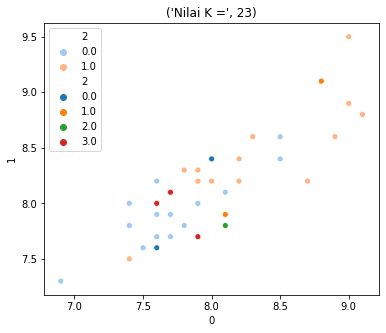

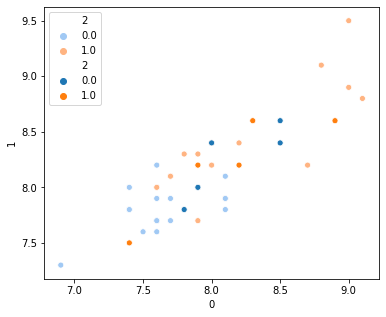

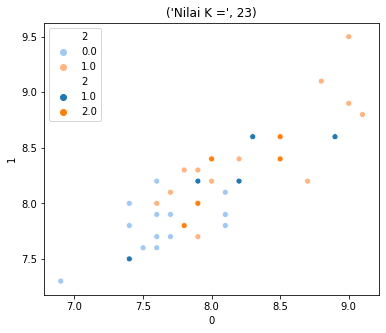

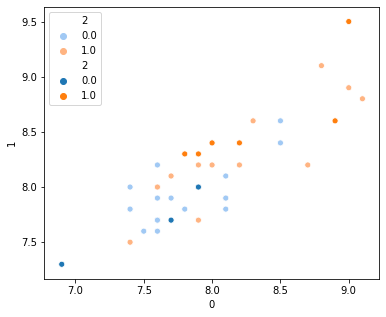

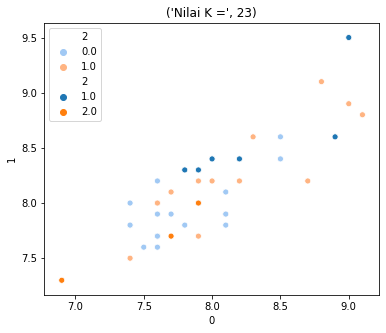

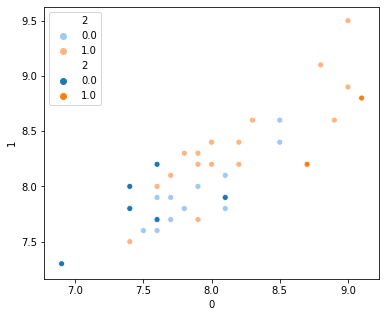

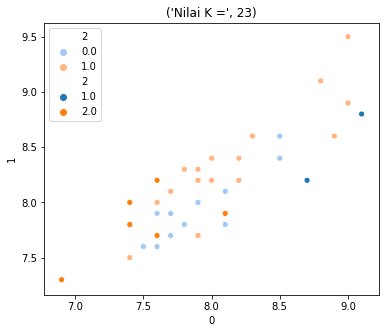

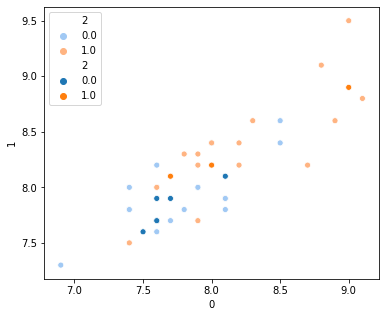

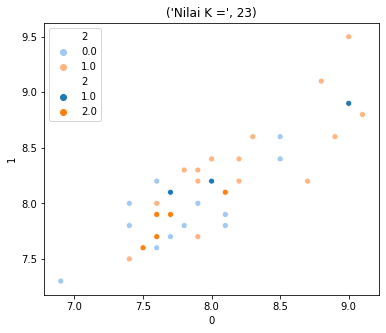

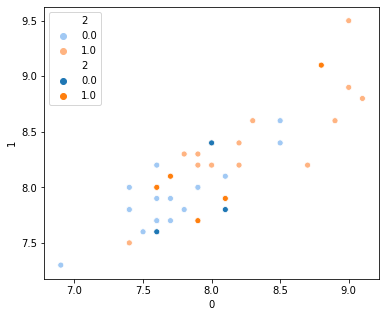

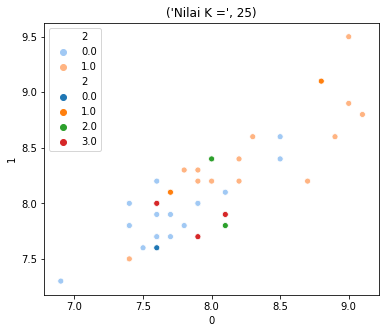

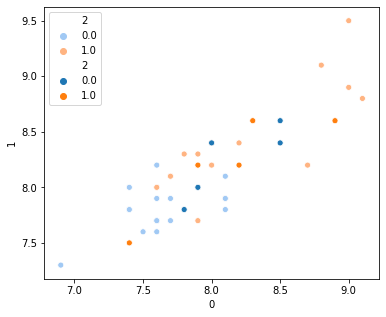

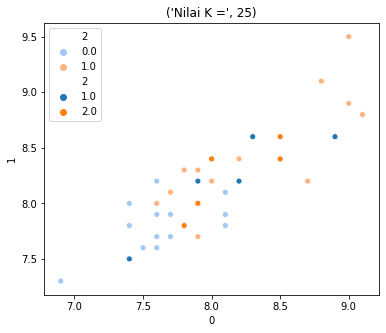

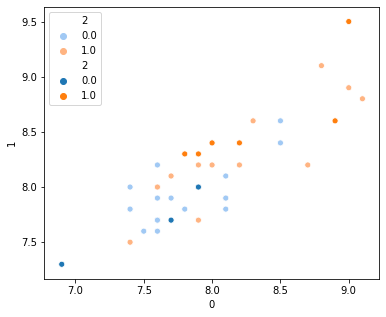

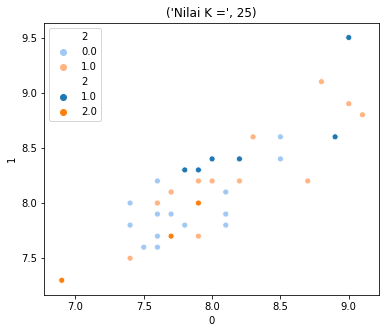

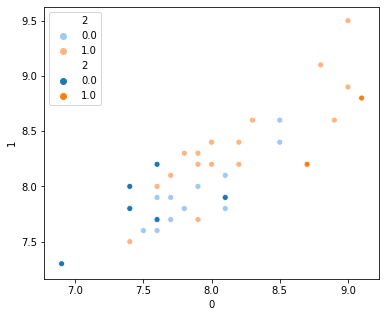

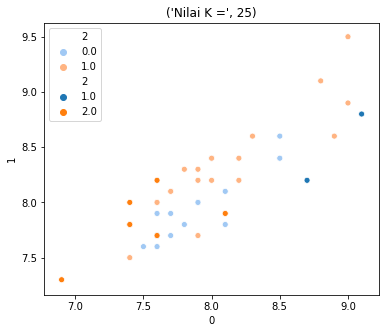

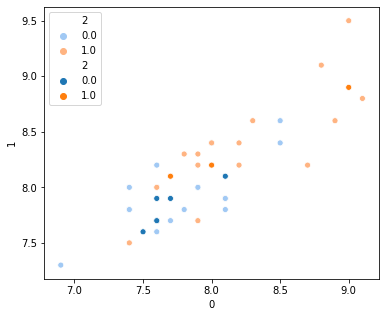

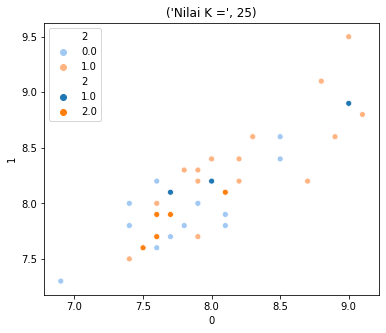

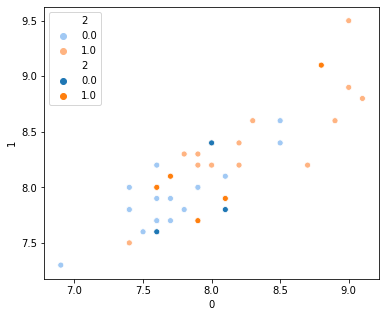

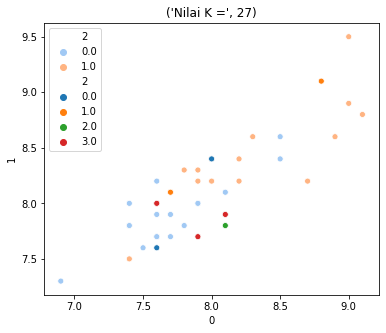

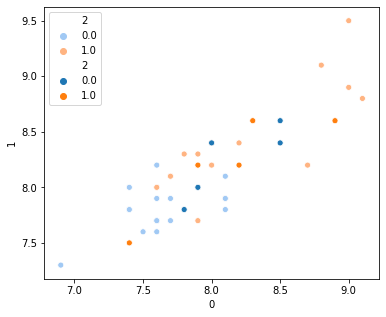

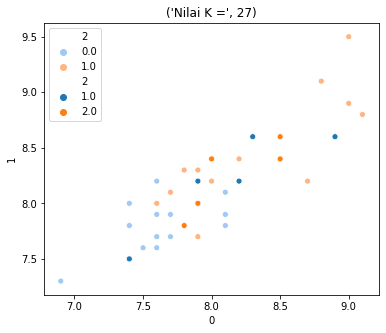

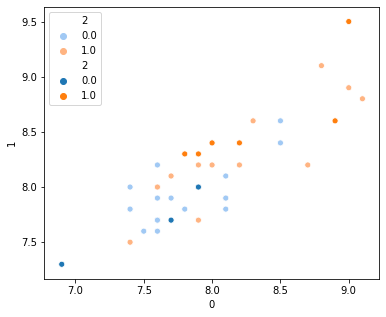

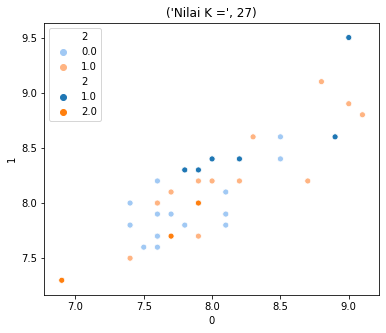

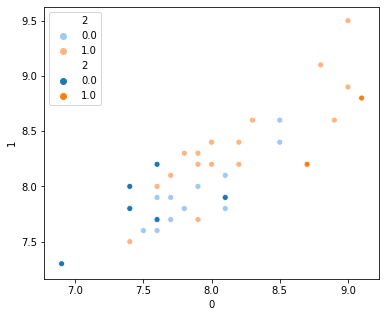

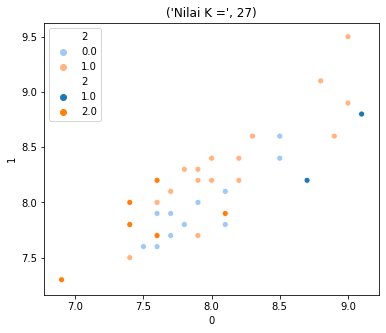

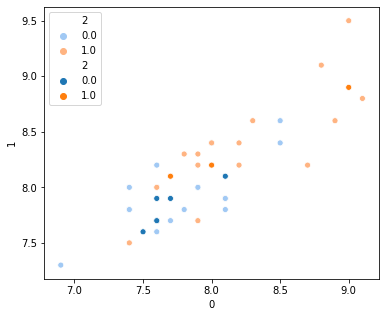

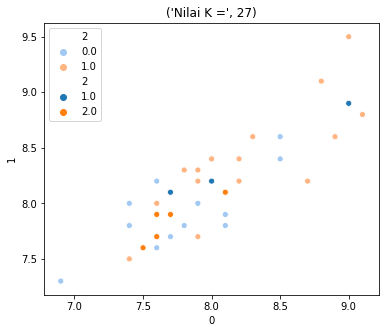

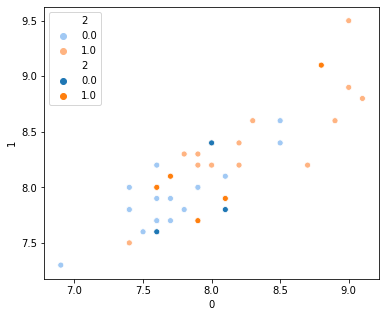

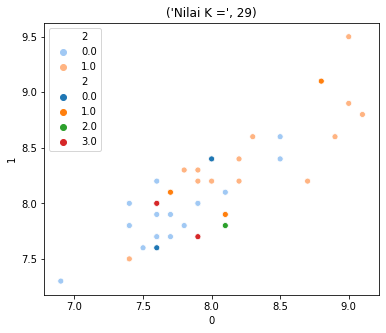

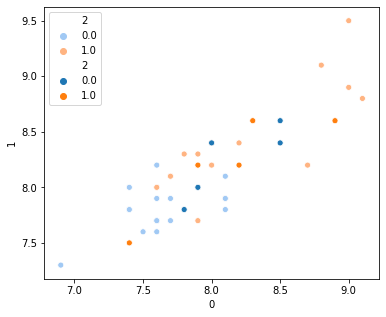

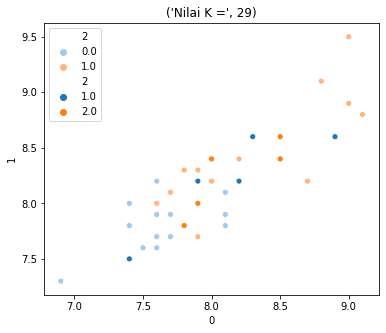

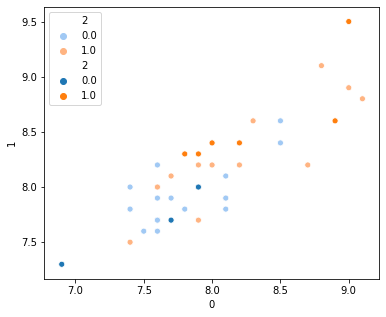

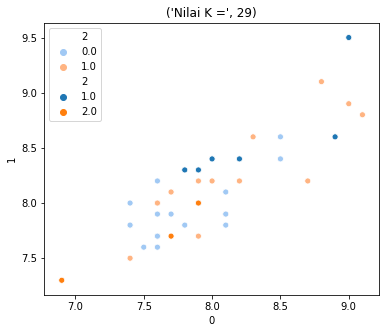

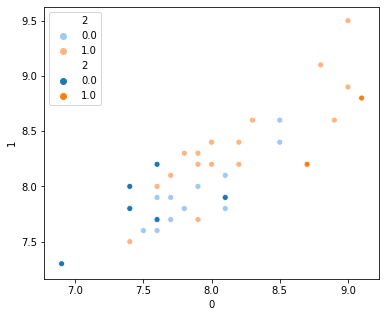

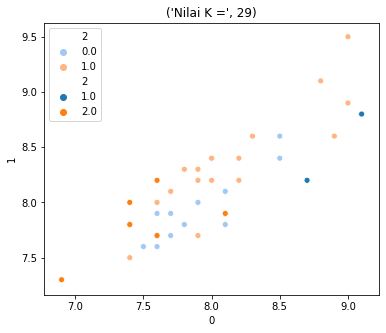

In [ ]:
X=data.values
X=X.astype(float64)
X[:,0]=X[:,0]/10
X[:,1]=X[:,1]/10 

# Cross Validation
e_K=[]
K=1
b_all=[]
e_accuracy=[]
for k in range (15):
    part=5
    error_all=[]
    error_all_sum=[]
    error_sum=0
    e_sum=0
    for i in range (part):
        bb=int(floor(len(X)*(i)/part))
        ba=int(ceil(len(X)*(i+1)/part))
        train=X[0:bb,:]
        train=append(train,X[ba:len(X),:])
        train=train.reshape(int(len(train)/3),3)
        training=pd.DataFrame(train)
        test=X[bb:ba,:]
        testing=pd.DataFrame(test)
        fig, g = plt.subplots(figsize=(6,5))
        g =sns.scatterplot(x=0, y=1, hue=2,data=training, palette=("pastel"), legend='full')
        g =sns.scatterplot(x=0, y=1, hue=2,data=testing, palette=("tab10"), legend='full')

        z_all=[]
        for j in range (len(test)):
            S=sqrt(((train[:,0]-test[j,0])**2)+((train[:,1]-test[j,1])**2)) #jarak
            S1=sort(S)
            idx=[]
            for l in range (K):
                a=where(S1[l]==S)[0][0]
                idx.append(a)
            b=train[idx,2]
            b_all.append(b)
            #menentukan label
            if sum(b)<(((k+1)*2)-1)/2: # kurang dari setengah banyaknya titik
                z=0
            else:
                z=1
            z_all=append(z_all,z)
        error=(test[:,2]-z_all)**2
        
        #untuk plot data test dan label hasil algoritma
        xx=zeros((len(test),3))
        xx[:,0]=test[:,0]
        xx[:,1]=test[:,1]
        for k in range (len(xx)):
            if error[k]==0:
                xx[k,2]=z_all[k]
            else:
                xx[k,2]=test[k,2]+2
        dxx=pd.DataFrame(xx)   

        #plot titik-titik data training dan data test
        fig, g = plt.subplots(figsize=(6,5))
        g =sns.scatterplot(x=0, y=1, hue=2,data=training, palette=("pastel"), legend='full').set(title= ('Nilai K =', K))
        g =sns.scatterplot(x=0, y=1, hue=2,data=dxx, palette=("tab10"), legend='full')
        
        #macam-macam error
        error_all=append(error_all,error)
        error_all_sum=append(error_all,sum(error))
        error_sum += sum(error)
        e=abs(test[:,2]-z_all)
        e_sum += sum(e)
    K+=2
    e_K=append(e_K,error_sum)
    e_accuracy=append(e_accuracy,e_sum)

In [ ]:
T=(((where(min(e_K[1:len(e_K)])==e_K)[0])+1)*2)-1
K=T[0]
if K==1: #menentukan K yang optimal
    K=T[1]
for j in range (10): #mencoba menerapkan 10 titik pada data baru
    x=rd.uniform(min(X[:,0]),max(X[:,0]))
    y=rd.uniform(min(X[:,1]),max(X[:,1]))
    S=sqrt(((X[:,0]-x)**2)+((X[:,1]-y)**2))
    S1=sort(S)
    idx=[]
    for i in range (K):
        a=where(S1[i]==S)[0][0]
        idx.append(a)
    b=X[idx,2]
    if sum(b)<(((K+1)*2)-1)/2:
        z=0
    else:
        z=1
    X1=append(X,[x,y,z])
    X=X1.reshape(int(len(X1)/3),3)

In [ ]:
#accuracy
idx=where(min(e_K[1:len(e_K)])==e_K)
accuracy=((len(test)*part)-e_accuracy[idx[0][0]])/(len(test)*part)